## Using Linear Regression for Market Movement Prediction

In [13]:
import os
import random
import numpy as np
from pylab import mpl, plt

In [14]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

/tmp/ipykernel_70768/1485804229.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [15]:
x = np.linspace(0, 10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [16]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds()

In [17]:
y = x + np.random.standard_normal(len(x))
y

array([-1.74976547,  0.54676204,  1.56119907,  0.35980886,  1.79764732,
        1.534627  ,  1.44566947,  0.3585281 ,  1.44315723,  2.09173614,
        1.58278934,  2.68006145,  1.86538454,  3.4699083 ,  3.52986366,
        2.95681335,  2.73402575,  4.49912044,  3.23533377,  2.75923277,
        5.70061431,  5.82731946,  4.23791678,  3.85144181,  5.08247787,
        6.03912302,  6.03712279,  6.87176021,  5.38804766,  5.97404336,
        6.34484859,  4.88331362,  5.77425994,  7.55114789,  7.68922027,
        6.68691022,  8.53656104,  5.86040358,  6.39870299,  6.72674916,
        7.61882614,  7.6991752 ,  8.57874313,  8.16257147, 10.27933991,
        7.45057785,  8.404445  ,  9.94934449,  8.18233986, 11.47071387])

In [18]:
reg = np.polyfit(x, y, deg=1)
reg

array([0.94612934, 0.22855261])

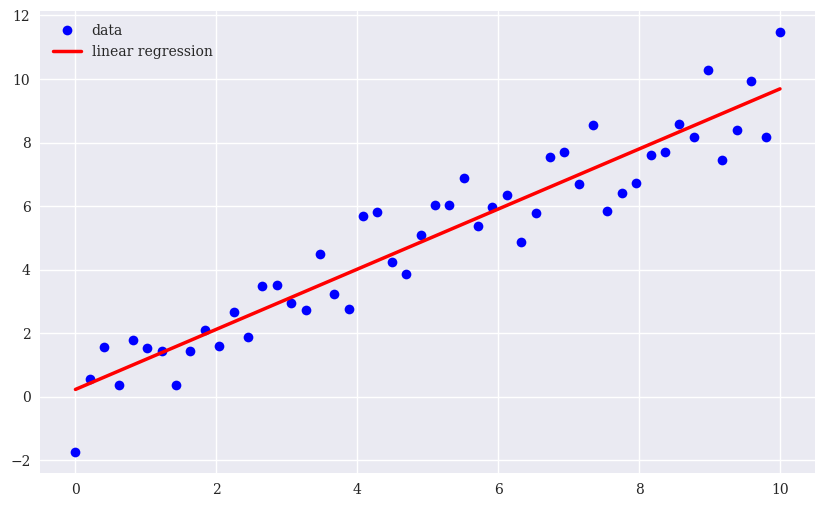

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0)

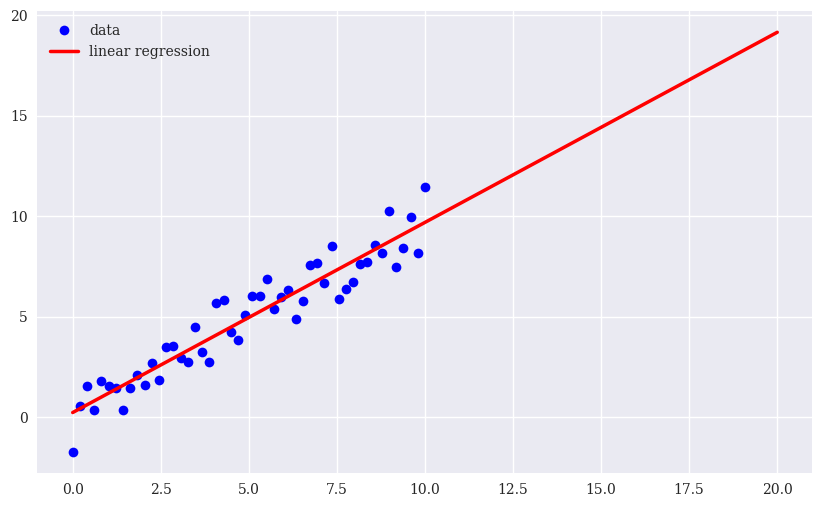

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0)

### The Basic Idea for Price Prediction

The number of days used as input is generally called lags. Using today’s index level and the two more from before therefore translates into three lags.

In [21]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
lags = 3

In [23]:
m = np.zeros((lags + 1, len(x) - lags))

In [24]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [25]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [26]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [27]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [28]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Predicting Index Levels

In [29]:
import pandas as pd

In [30]:
raw = pd.read_csv("pyalgo_eikon_eod_data.csv", index_col=0, parse_dates=True).dropna()

In [31]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [32]:
symbol = 'EUR='

In [33]:
data = pd.DataFrame(raw[symbol])

In [34]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [35]:
data

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [36]:
lags = 5

In [37]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [40]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [41]:
data['prediction'] = np.dot(data[cols], reg)

<Axes: xlabel='Date'>

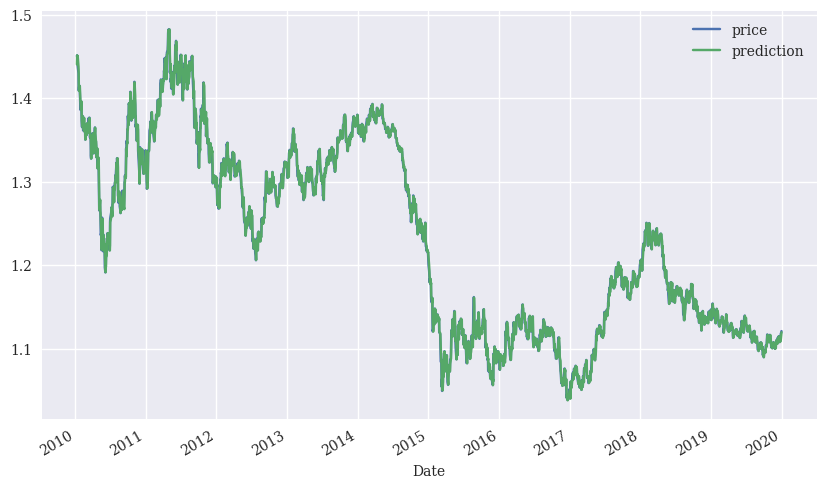

In [42]:
data[['price', 'prediction']].plot(figsize=(10, 6))

<Axes: xlabel='Date'>

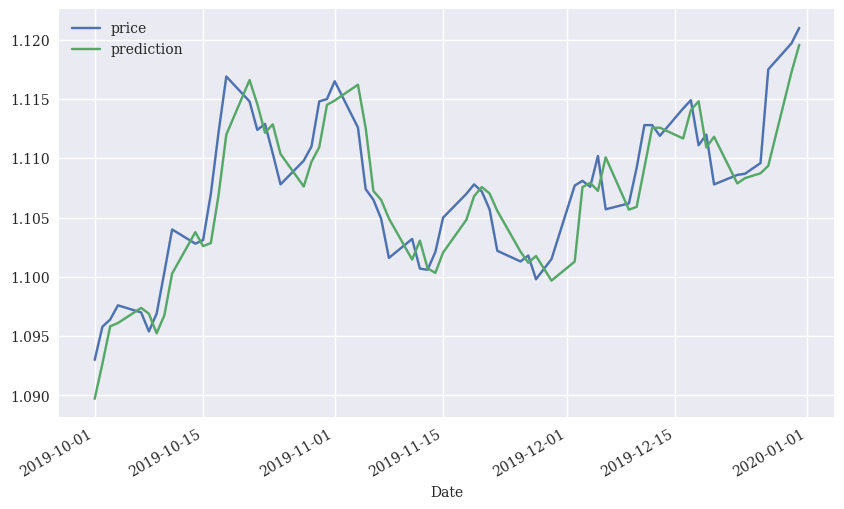

In [43]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6))